In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [56]:
def read_data(path):
    df = pd.read_csv(path)
    df.drop('Unnamed: 0', axis=1, inplace=True)
    return df

In [57]:
def contain_nan(df):
    has_null = df.isna().any()
    is_null = df.isna().sum()
    for col in df.columns:
        print(f"{col:<25} {'True ' if has_null[col] else 'False'}  {is_null[col]}")

In [58]:
def select_features_KBest(X, y):
    X_new = SelectKBest(f_classif, k=2).fit_transform(X, y)
    return X_new

In [59]:
def select_features_Tree(X, y):
    clf = ExtraTreesClassifier(n_estimators=50)
    clf = clf.fit(X, y)
    print(clf.feature_importances_)
    model = SelectFromModel(clf, prefit=True)
    X_new = model.transform(X)
    return X_new

In [60]:
def split_data(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=27)
    return (X_train, X_test, y_train, y_test)

In [61]:
def OHE(df):
    encoder = OneHotEncoder()
    encoded_features = encoder.fit_transform(df[:, 0].reshape(-1, 1))
    df = np.delete(np.concatenate((df, encoded_features.toarray()), axis=1), np.s_[0:1], axis=1)
    return df

In [62]:
df = read_data('data/train_2.csv')

In [63]:
contain_nan(df)

trustLevel                False  0
totalScanTimeInSeconds    False  0
grandTotal                False  0
lineItemVoids             False  0
scansWithoutRegistration  False  0
quantityModifications     False  0
scannedLineItemsPerSecond False  0
valuePerSecond            False  0
lineItemVoidsPerPosition  False  0
fraud                     False  0


### Missing values are missing

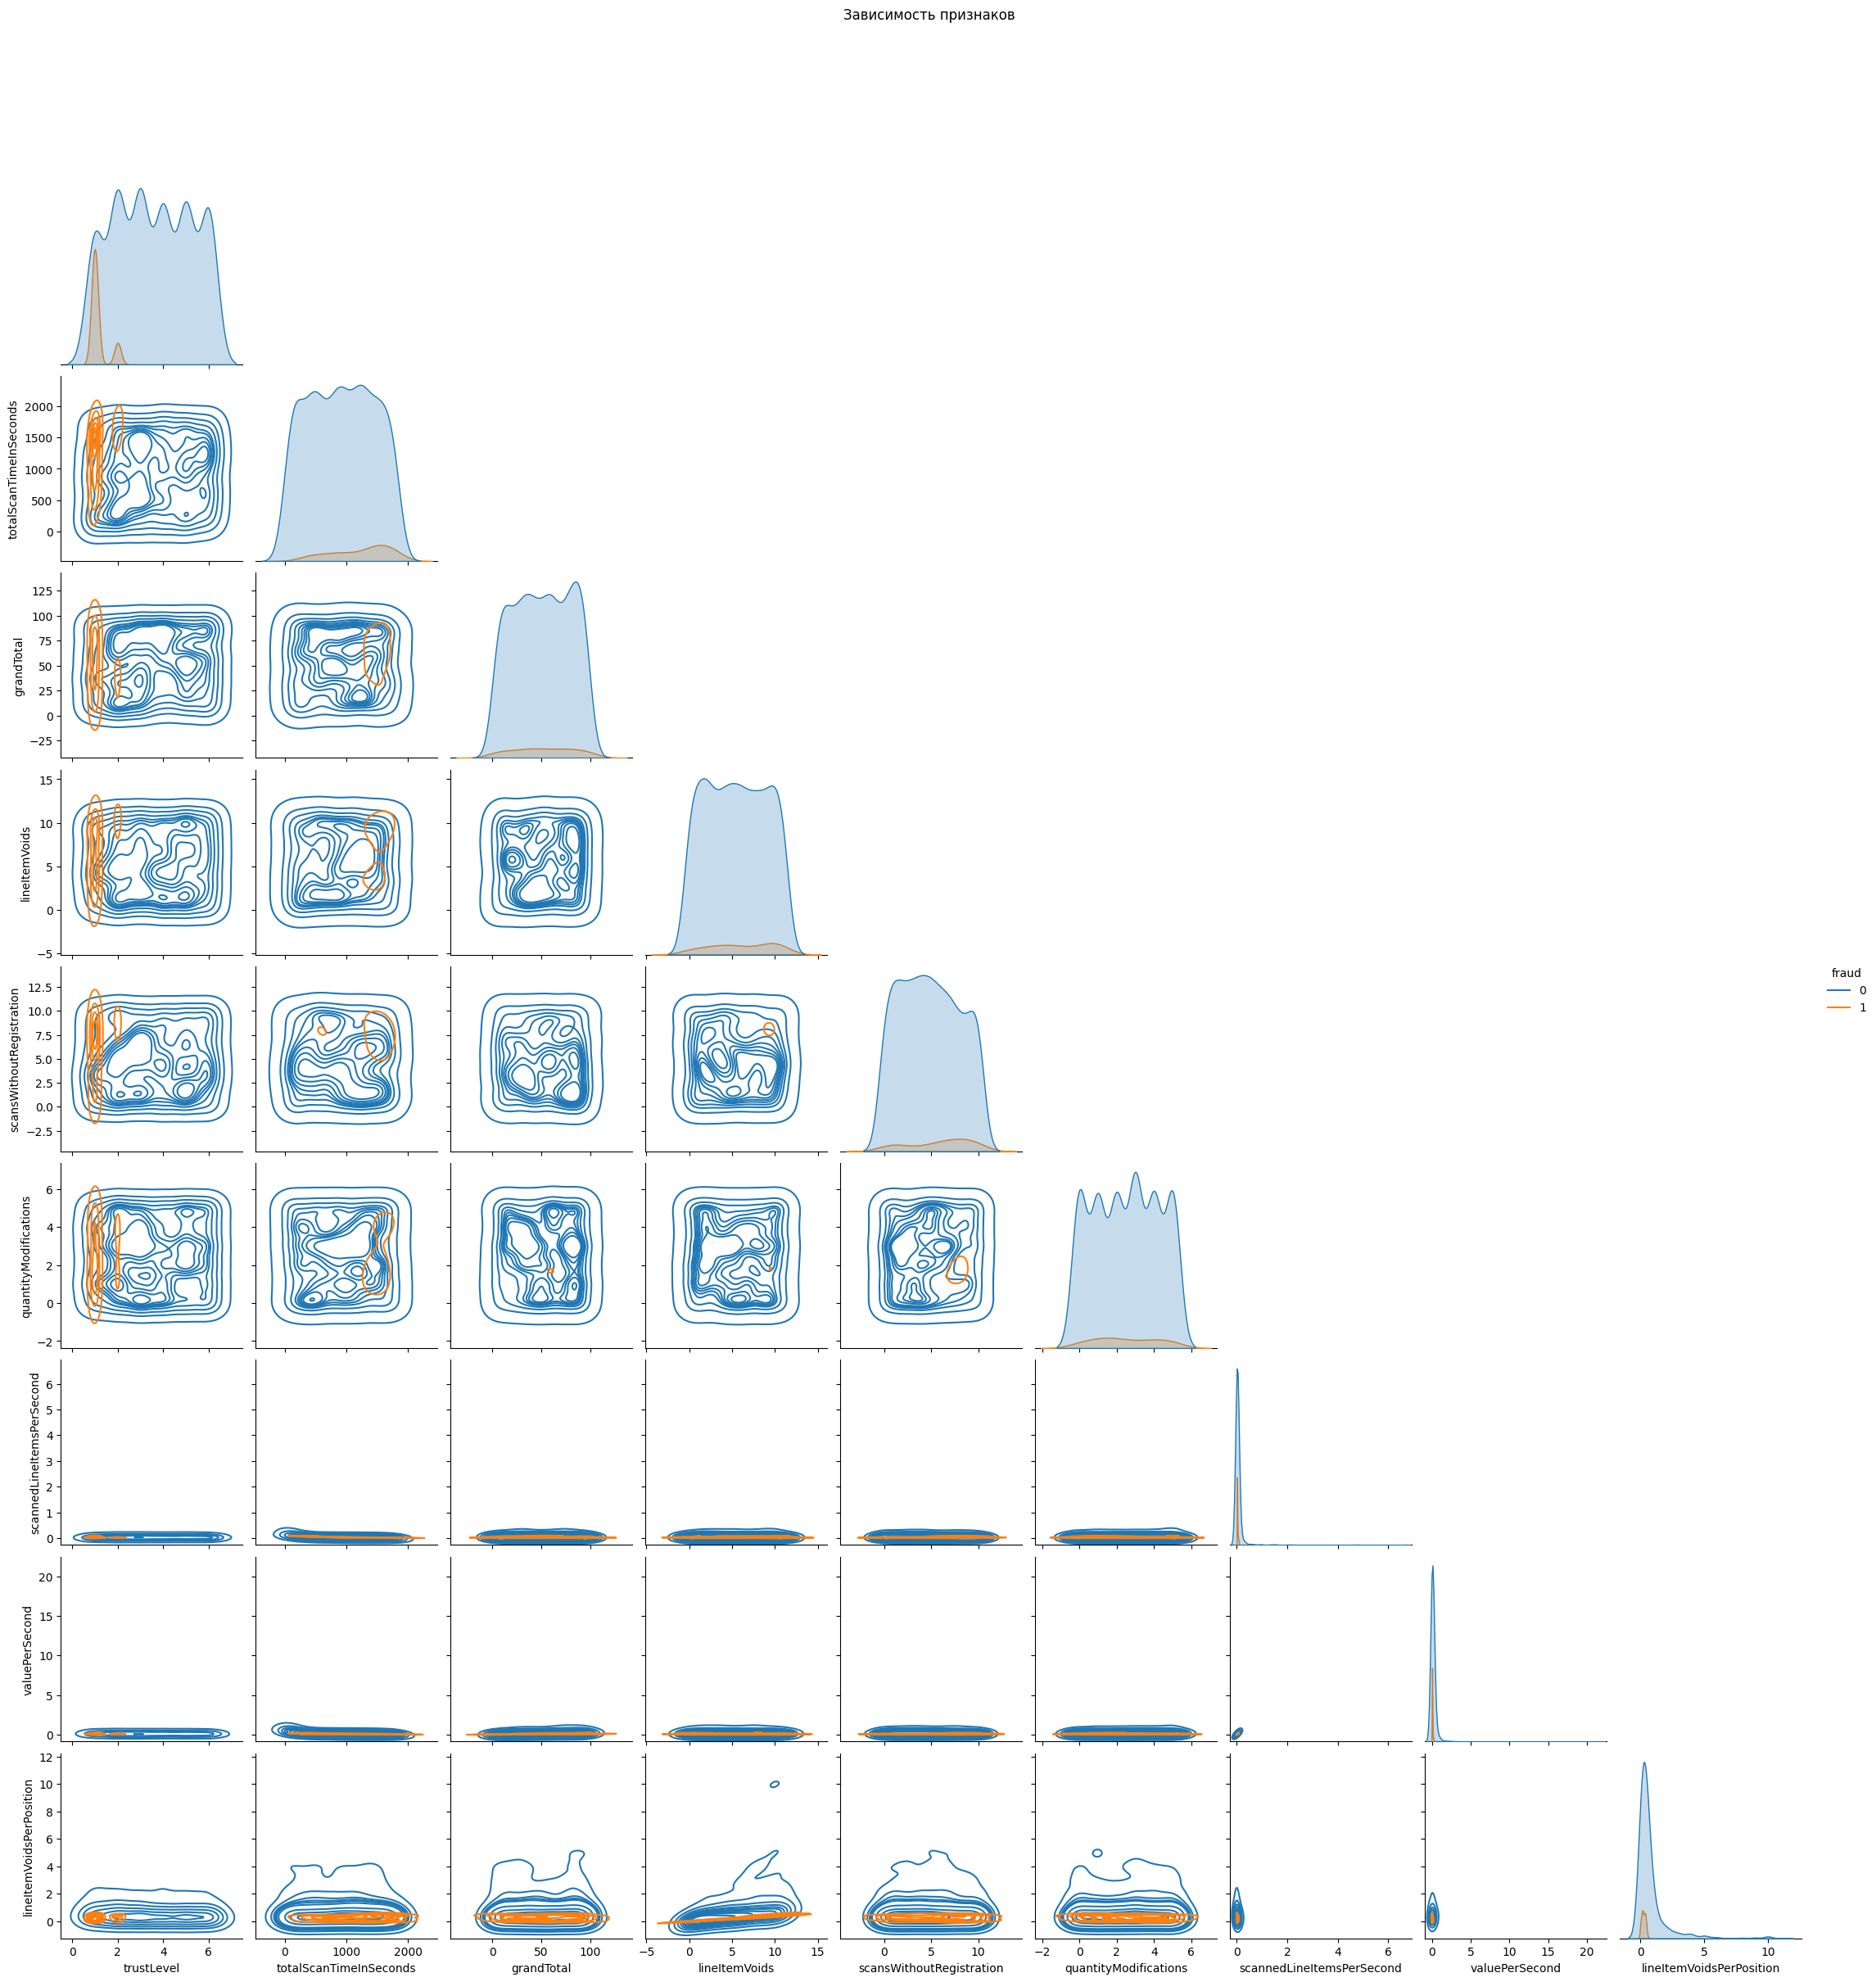

In [64]:
sns.pairplot(df, hue='fraud', corner=True, kind='kde').fig.suptitle('Зависимость признаков', y=1.08);

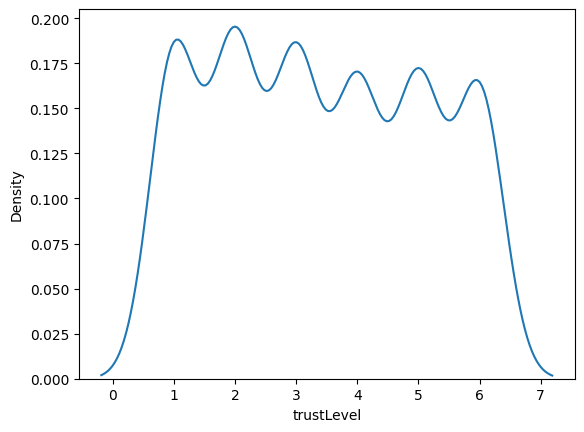

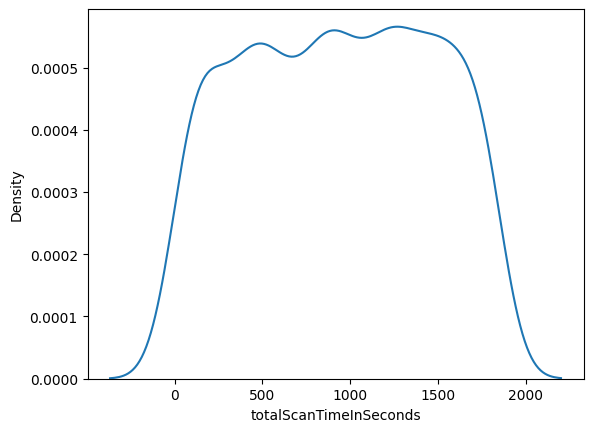

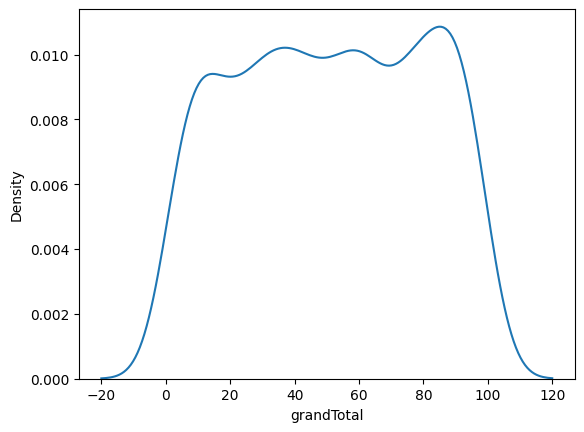

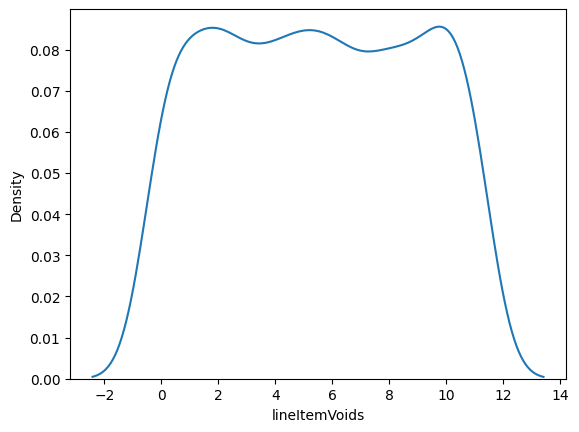

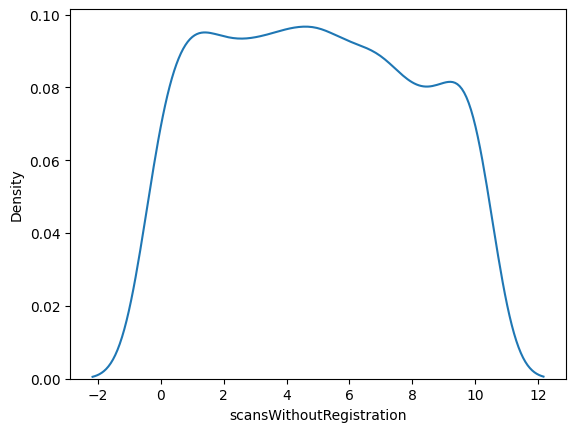

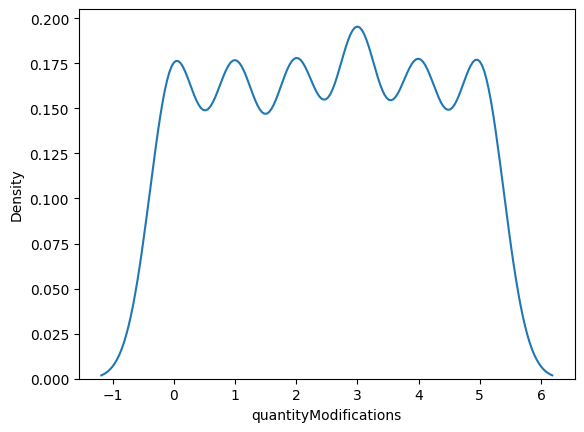

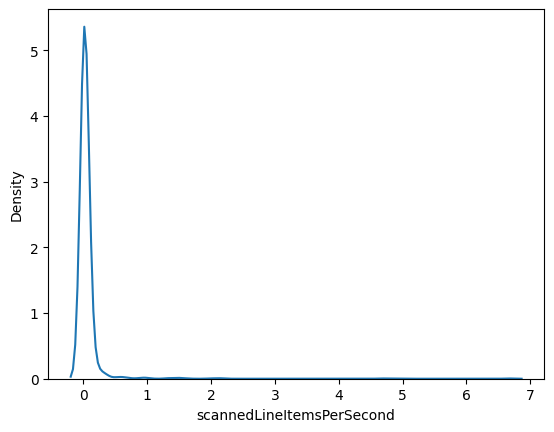

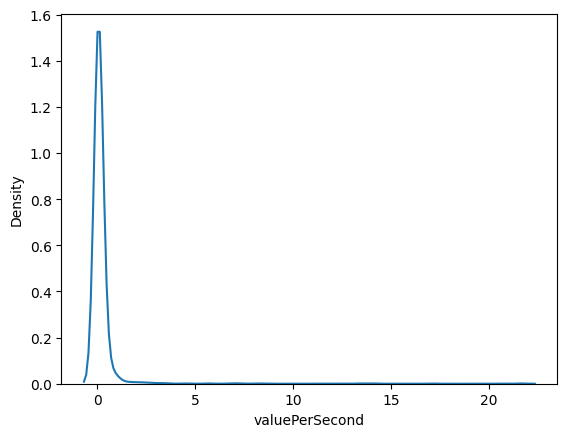

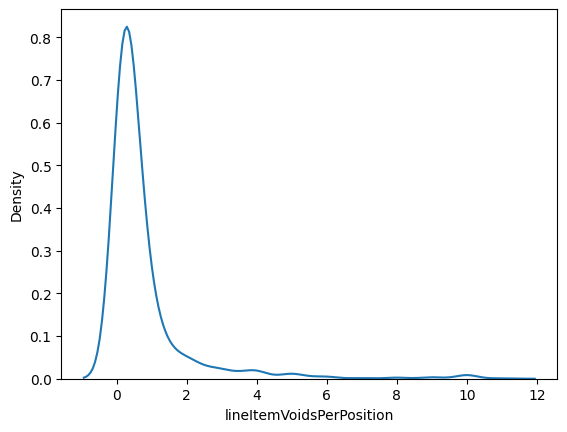

In [83]:
for _ in df.columns[0:9]:
    plt.figure()
    sns.kdeplot(df[_])

### SelectKBest selected trustLevel & totalScanTimeInSecond

In [65]:
X = df.iloc[:, 0:9]
X = select_features_KBest(X, df[['fraud']])

c:\Users\egore\Desktop\DMC2019\.venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
X = df.iloc[:, 0:9]

### Tree-based feature selection: trustLevel & totalScanTimeInSecond & scannedLineItemsPerSecond

In [67]:
X = select_features_Tree(X, df['fraud'])

c:\Users\egore\Desktop\DMC2019\.venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


[0.22624785 0.12422782 0.07238944 0.08087778 0.08046886 0.05849302
 0.18946291 0.06893695 0.09889538]


In [68]:
X_train, X_test, y_train, y_test = split_data(X, df['fraud'])

### Random Forest w/o hyperparameter selection

In [69]:
clf = RandomForestClassifier(n_estimators=150)
clf.fit(OHE(X_train), y_train)
predict = clf.predict(OHE(X_test))
print(accuracy_score(y_test, predict))

0.9667774086378738


In [70]:
print(confusion_matrix(y_test, predict))

[[280   6]
 [  4  11]]


In [71]:
clf.predict(OHE(read_data('data/test_2.csv')[['trustLevel', 'totalScanTimeInSeconds', 'scannedLineItemsPerSecond']].to_numpy()))

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [72]:
df_to_send = read_data('data/test_2.csv')

In [73]:
df_to_send['fraud'] = clf.predict(OHE(read_data('data/test_2.csv')[['trustLevel', 'totalScanTimeInSeconds', 'scannedLineItemsPerSecond']].to_numpy()))

In [74]:
df_to_send.to_csv('./data/res.csv')